In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE =256
BATCH_SIZE=32
CHANNELS =3
EPOCHS =20

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
   "/content/drive/MyDrive/DL_Project/Potato_disease/PlantVillage",
   shuffle =True,
   image_size =(IMAGE_SIZE,IMAGE_SIZE),
   batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names = dataset.class_names

In [5]:
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

68

In [7]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch[0].shape)
  print(label_batch[0].numpy())

(256, 256, 3)
0


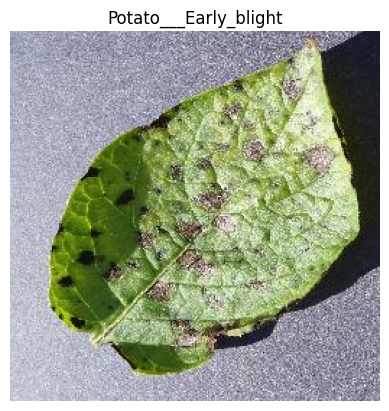

In [8]:
for image_batch, label_batch in dataset.take(1):

 plt.imshow(image_batch[0].numpy().astype("uint8"))
 plt.title(class_names[label_batch[0]])
 plt.axis('off')

In [9]:
#80% ==> training
#20% ==> 10%validation, 10%test

In [10]:
# train_size =0.8
# len(dataset)*train_size

In [11]:
# train_ds= dataset.take(54)
# len(train_ds)

In [12]:
# test_ds=dataset.skip(54)
# len(test_ds)

In [13]:
# val_size = 0.1
# len(dataset)*val_size

In [14]:
# val_ds= test_ds.take(6)

In [15]:
# test_ds=test_ds.skip(6)

In [16]:
# len(test_ds)

In [17]:
# len(val_ds)

In [18]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split =0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
  ds_size=len(ds)

  if shuffle:
    ds=ds.shuffle(shuffle_size, seed=12)

  train_size= int(train_split * ds_size)
  # print(train_size)
  val_size =int(val_split * ds_size)

  train_ds =ds.take(train_size)
  # print(len(train_ds))

  val_ds =ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  return train_ds, val_ds, test_ds

In [19]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [20]:
len(train_ds)

54

In [21]:
len(val_ds)

6

In [22]:
len(test_ds)

8

In [23]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [24]:
resize_rescale=tf.keras.Sequential(
    [
        layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
        layers.experimental.preprocessing.Rescaling(1.0/255)
    ]
)

In [25]:
data_agumentation=tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        layers.experimental.preprocessing.RandomRotation(0.2)
    ]
)

In [26]:
# convonutional neural network
n_classes = 3
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
model = models.Sequential(
    [
        resize_rescale,
        data_agumentation,
        layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64,(3,3),activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(n_classes, activation = 'softmax')

    ]
)
model.build(input_shape=input_shape)

In [27]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [28]:
model.compile(
    optimizer ='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [29]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose =1,
    validation_data = val_ds
)

Epoch 1/20
54/54 [==============================] - 419s 139ms/step - loss: 0.7153 - accuracy: 0.7031 - val_loss: 0.4521 - val_accuracy: 0.8594
Epoch 2/20
54/54 [==============================] - 3s 61ms/step - loss: 0.4504 - accuracy: 0.8333 - val_loss: 0.3347 - val_accuracy: 0.8646
Epoch 3/20
54/54 [==============================] - 3s 62ms/step - loss: 0.3059 - accuracy: 0.8756 - val_loss: 0.3080 - val_accuracy: 0.8750
Epoch 4/20
54/54 [==============================] - 3s 62ms/step - loss: 0.2299 - accuracy: 0.8848 - val_loss: 0.2250 - val_accuracy: 0.8906
Epoch 5/20
54/54 [==============================] - 3s 61ms/step - loss: 0.2192 - accuracy: 0.9109 - val_loss: 0.3838 - val_accuracy: 0.7865
Epoch 6/20
54/54 [==============================] - 3s 61ms/step - loss: 0.2359 - accuracy: 0.9086 - val_loss: 0.3048 - val_accuracy: 0.8750
Epoch 7/20
54/54 [==============================] - 3s 61ms/step - loss: 0.1732 - accuracy: 0.9375 - val_loss: 0.6183 - val_accuracy: 0.7188
Epoch 8/20

In [30]:
scores= model.evaluate(test_ds)

8/8 [==============================] - 4s 29ms/step - loss: 0.2054 - accuracy: 0.9258


In [31]:
scores

[0.20537477731704712, 0.92578125]

In [32]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [33]:
acc=history.history['accuracy']
val_acc = history.history['val_accuracy']

loss =history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Traninig and Validation Accuracy')

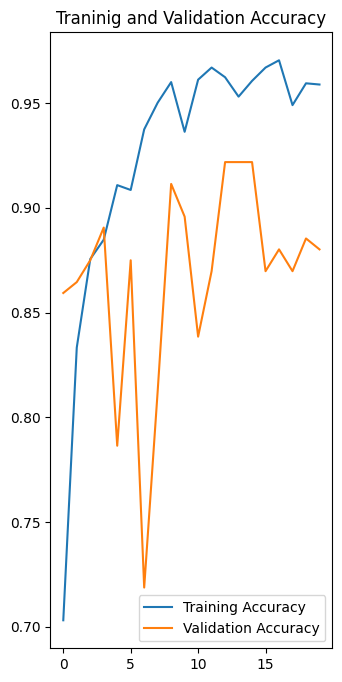

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Traninig and Validation Accuracy')

Text(0.5, 1.0, 'Traninig and Validation Loss')

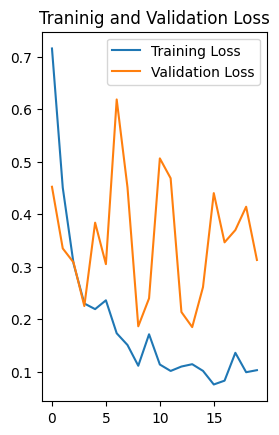

In [35]:
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss,label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Traninig and Validation Loss')

First image to predict
first image's actual label Potato___Early_blight
1/1 [==============================] - 0s 209ms/step
Predicted Label Potato___Early_blight


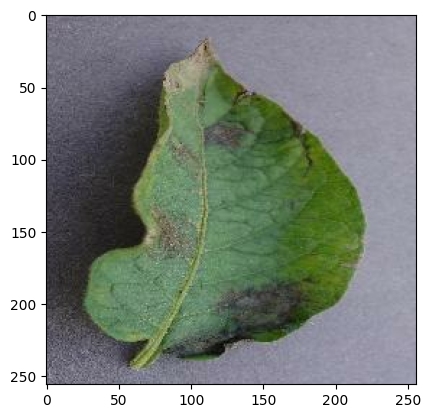

In [37]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
  first_image = images_batch[0].numpy().astype('uint8')
  first_label = label_batch[0].numpy()

  print('First image to predict')
  plt.imshow(first_image)
  print("first image's actual label",class_names[first_label])

  batch_prediction =model.predict(image_batch)
  print("Predicted Label",class_names[np.argmax(batch_prediction[0])])